# IMBD Top 1000 Movies 

## Load the dataset and import librarys:

In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
file_path = 'movies.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,Title,Release year,Plot summary,Genre,Rating,Runtime,IMDb rating,Metascore,Director,Stars,Votes,Gross
0,The Shawshank Redemption,1994,"Over the course of several years, two convicts...",Drama,9.3,142 min,9.3,82.0,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...","2,869,913",$28.34M
1,The Dark Knight,2008,When the menace known as the Joker wreaks havo...,"Action, Crime, Drama",9.0,152 min,9.0,84.0,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...","2,851,842",$534.86M
2,Inception,2010,A thief who steals corporate secrets through t...,"Action, Adventure, Sci-Fi",8.8,148 min,8.8,74.0,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...","2,532,959",$292.58M
3,Fight Club,1999,An insomniac office worker and a devil-may-car...,Drama,8.8,139 min,8.8,67.0,David Fincher,"Brad Pitt, Edward Norton, Meat Loaf, Zach Grenier","2,305,364",$37.03M
4,Pulp Fiction,1994,"The lives of two mob hitmen, a boxer, a gangst...","Crime, Drama",8.9,154 min,8.9,95.0,Quentin Tarantino,"John Travolta, Uma Thurman, Samuel L. Jackson,...","2,204,248",$107.93M


# Data Processing and Cleaning:
## Data Cleaning:
### Handling missing values:

In [2]:
# Step 1: Check for Missing Values
data.isnull().sum()



Title            0
Release year     0
Plot summary     0
Genre            0
Rating           0
Runtime          0
IMDb rating      0
Metascore       27
Director         0
Stars            0
Votes            0
Gross           39
dtype: int64

What was done: Checked for the presence of missing values in each column of the dataset.
Why it was necessary: Identifying missing values is crucial to assess the quality of the data and decide on appropriate handling techniques.

###  Data Type Conversion

In [3]:
# Step 2: Data Type Conversion
# Convert 'Release year' to integer
data['Release year'] = pd.to_numeric(data['Release year'], errors='coerce')

# Convert 'IMDb rating' to float
data['IMDb rating'] = pd.to_numeric(data['IMDb rating'], errors='coerce')

# Convert 'votes' to integer
data['Votes'] = data['Votes'].str.replace(',', '').astype(int)



What was done: Converted the 'Release year' column to integer and 'Votes' column to integer and the 'IMDb rating' column to float.
Why it was necessary: Ensuring that data types are consistent with the data they represent is important for analysis and computation. For example, the release year should be an integer, and ratings should be floating-point numbers.

### Remove Unnecessary Characters:

In [4]:
# Step 3: Remove Unnecessary Characters
# Remove 'min' from 'Runtime' and convert to integer
data['Runtime'] = data['Runtime'].str.replace(' min', '').astype(float)

# Remove '$' and 'M' from 'Gross', convert to float, and multiply by 1 million
data['Gross'] = data['Gross'].str.replace('[\$\,M]', '', regex=True).astype(float) * 1e6


What was done: Removed non-numeric characters from the 'Runtime' and 'Gross' columns and converted them to appropriate numeric types.
Why it was necessary: Numeric columns containing non-numeric characters cannot be used for mathematical operations. Cleaning these columns allows for accurate calculations and analysis.

### Splitting Columns 

In [5]:
# Step 4: Splitting Columns 
data['Stars'] = data['Stars'].str.split(', ')


What was done: Split the 'Stars' column into a list of individual names.
Why it was necessary: The 'Stars' column contained multiple names in a single string, which is not ideal for analysis. Splitting the names into a list allows for easier manipulation and analysis of individual names.

### Handling missing values

In [6]:
# Handling missing values

# For 'Metascore', we'll fill missing values with the median
metascore_median = data['Metascore'].median()
data['Metascore'].fillna(metascore_median, inplace=True)

# For 'Gross', we'll fill missing values with the median
gross_median = data['Gross'].median()
data['Gross'].fillna(gross_median, inplace=True)

# Fill missing values in 'Release year' with the median
release_year_median = data['Release year'].median()
data['Release year'].fillna(release_year_median, inplace=True)

# Check if there are any missing values left
data.isnull().sum()


Title           0
Release year    0
Plot summary    0
Genre           0
Rating          0
Runtime         0
IMDb rating     0
Metascore       0
Director        0
Stars           0
Votes           0
Gross           0
dtype: int64

What was done: Filled missing values in the 'Metascore', 'Gross', and 'Release year' columns with their respective median values. Why it was necessary: Missing values can affect the results of analyses and computations. Filling them with a central tendency measure is a common practice to maintain the overall distribution of the data.

### cleaned data:

In [7]:
# Display the cleaned dataset 
data.head()

,Title,Release year,Plot summary,Genre,Rating,Runtime,IMDb rating,Metascore,Director,Stars,Votes,Gross
0,The Shawshank Redemption,1994.0,"Over the course of several years, two convicts...",Drama,9.3,142.0,9.3,82.0,Frank Darabont,"[Tim Robbins, Morgan Freeman, Bob Gunton, Will...",2869913,28340000.0
1,The Dark Knight,2008.0,When the menace known as the Joker wreaks havo...,"Action, Crime, Drama",9.0,152.0,9.0,84.0,Christopher Nolan,"[Christian Bale, Heath Ledger, Aaron Eckhart, ...",2851842,534860000.0
2,Inception,2010.0,A thief who steals corporate secrets through t...,"Action, Adventure, Sci-Fi",8.8,148.0,8.8,74.0,Christopher Nolan,"[Leonardo DiCaprio, Joseph Gordon-Levitt, Elli...",2532959,292580000.0
3,Fight Club,1999.0,An insomniac office worker and a devil-may-car...,Drama,8.8,139.0,8.8,67.0,David Fincher,"[Brad Pitt, Edward Norton, Meat Loaf, Zach Gre...",2305364,37030000.0
4,Pulp Fiction,1994.0,"The lives of two mob hitmen, a boxer, a gangst...","Crime, Drama",8.9,154.0,8.9,95.0,Quentin Tarantino,"[John Travolta, Uma Thurman, Samuel L. Jackson...",2204248,107930000.0


# Preprocessing: 
### 1- Normilazation:

In [8]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object with the custom range (1 to 10)
custom_scaler = MinMaxScaler(feature_range=(1, 10))

# Normalize the specified columns in the original 'data' DataFrame
columns_to_normalize = ['Metascore', 'Votes', 'Gross']
data[columns_to_normalize] = custom_scaler.fit_transform(data[columns_to_normalize])
data.head()

,Title,Release year,Plot summary,Genre,Rating,Runtime,IMDb rating,Metascore,Director,Stars,Votes,Gross
0,The Shawshank Redemption,1994.0,"Over the course of several years, two convicts...",Drama,9.3,142.0,9.3,8.219780,Frank Darabont,"[Tim Robbins, Morgan Freeman, Bob Gunton, Will...",10.000000,1.272308
1,The Dark Knight,2008.0,When the menace known as the Joker wreaks havo...,"Action, Crime, Drama",9.0,152.0,9.0,8.417582,Christopher Nolan,"[Christian Bale, Heath Ledger, Aaron Eckhart, ...",9.941789,6.139261
2,Inception,2010.0,A thief who steals corporate secrets through t...,"Action, Adventure, Sci-Fi",8.8,148.0,8.8,7.428571,Christopher Nolan,"[Leonardo DiCaprio, Joseph Gordon-Levitt, Elli...",8.914598,3.811287
3,Fight Club,1999.0,An insomniac office worker and a devil-may-car...,Drama,8.8,139.0,8.8,6.736264,David Fincher,"[Brad Pitt, Edward Norton, Meat Loaf, Zach Gre...",8.181464,1.355807
4,Pulp Fiction,1994.0,"The lives of two mob hitmen, a boxer, a gangst...","Crime, Drama",8.9,154.0,8.9,9.505495,Quentin Tarantino,"[John Travolta, Uma Thurman, Samuel L. Jackson...",7.855748,2.037057


What was done: The 'MetaScore', 'Votes', and 'Gross' columns were normalized to a scale of 1-10.

Why it was necessary: the normalization was done to ensure that the data is presented consistently for comparison and visualization. Since IMDB ratings typically fall within the 1, 10 range aligning the 'MetaScore' 'Votes' and 'Gross columns, on the scale makes it easier to analyze and understand. By bringing all values to a scale it simplifies the process of gauging the significance or size of these variables relative, to each other.

### 2- Discretization:

In [9]:


# Drop rows with NaN values in 'IMDb rating' column
data = data.dropna(subset=['IMDb rating'])

# Define the bins and labels for discretization
bins = [0, 6.9, 8.4, 10]
labels = ['Low', 'Medium', 'High']

# Discretize the 'IMDb rating' column
data['Rating Category'] = pd.cut(data['IMDb rating'], bins=bins, labels=labels, include_lowest=True)

# Display the updated dataset with the new 'Rating Category' column
data.head()

,Title,Release year,Plot summary,Genre,Rating,Runtime,IMDb rating,Metascore,Director,Stars,Votes,Gross,Rating Category
0,The Shawshank Redemption,1994.0,"Over the course of several years, two convicts...",Drama,9.3,142.0,9.3,8.219780,Frank Darabont,"[Tim Robbins, Morgan Freeman, Bob Gunton, Will...",10.000000,1.272308,High
1,The Dark Knight,2008.0,When the menace known as the Joker wreaks havo...,"Action, Crime, Drama",9.0,152.0,9.0,8.417582,Christopher Nolan,"[Christian Bale, Heath Ledger, Aaron Eckhart, ...",9.941789,6.139261,High
2,Inception,2010.0,A thief who steals corporate secrets through t...,"Action, Adventure, Sci-Fi",8.8,148.0,8.8,7.428571,Christopher Nolan,"[Leonardo DiCaprio, Joseph Gordon-Levitt, Elli...",8.914598,3.811287,High
3,Fight Club,1999.0,An insomniac office worker and a devil-may-car...,Drama,8.8,139.0,8.8,6.736264,David Fincher,"[Brad Pitt, Edward Norton, Meat Loaf, Zach Gre...",8.181464,1.355807,High
4,Pulp Fiction,1994.0,"The lives of two mob hitmen, a boxer, a gangst...","Crime, Drama",8.9,154.0,8.9,9.505495,Quentin Tarantino,"[John Travolta, Uma Thurman, Samuel L. Jackson...",7.855748,2.037057,High


Was done:  we discretized 'IMDb rating' into the categories (low, medium, high ) 'Low' for ratings below 7.0, 'Medium' for ratings between 7.0 and 8.4, and 'High' for ratings 8.5 and above. Why it was necessary: provides a simplified representation of the ratings, allowing for easier analysis and comparison. we can identify patterns within each category.

### 3- Feature Selection:

After thoroughly analyzing the dataset and attempting multiple feature selection techniques and codes, we have come to the conclusion that it is better not to apply feature selection. This decision is based on several reasons:

Firstly ,The IMDb dataset usually comes with a list of limited features.like movie title, release year plot summary, gross, rating, runtime IMDb rating, Metascore, director, stars, votes and genre.With a number of features that are already relevant to the movie data and offer valuable insights for analysis.
Additionally In terms of movie data analysis most features are directly related to the study. Each feature plays a role, in understanding aspects of a movie.Removing any of these features could lead to losing details and potentially affecting the analysis.  
Lastly, Movie data is commonly examined as a whole by considering features to grasp a thorough understanding of movies and their characteristics. 

Based on these reasons, we have decided to utilize the IMDb dataset without applying feature selection in order to obtain the best possible results for our analysis.

In [10]:
#Data visualization and analysis
#Statistical description of numerical columns
movie_DF= pd.DataFrame(data)
movie_DF.describe()

,Release year,Rating,Runtime,IMDb rating,Metascore,Votes,Gross
count,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000
mean,2000.522784,7.006610,114.147722,7.006610,6.239282,1.706129,1.784810
std,14.139624,0.847551,21.259413,0.847551,1.713948,0.934589,0.819826
min,1921.000000,1.900000,64.000000,1.900000,1.000000,1.000000,1.000000
25%,1997.000000,6.400000,99.000000,6.400000,4.956044,1.170325,1.253859
50%,2004.000000,7.100000,111.000000,7.100000,6.241758,1.385879,1.544088
75%,2009.000000,7.600000,126.000000,7.600000,7.527473,1.823659,2.054737
max,2016.000000,9.300000,238.000000,9.300000,10.000000,10.000000,10.000000


In [11]:
movie_DF.head()

,Title,Release year,Plot summary,Genre,Rating,Runtime,IMDb rating,Metascore,Director,Stars,Votes,Gross,Rating Category
0,The Shawshank Redemption,1994.0,"Over the course of several years, two convicts...",Drama,9.3,142.0,9.3,8.219780,Frank Darabont,"[Tim Robbins, Morgan Freeman, Bob Gunton, Will...",10.000000,1.272308,High
1,The Dark Knight,2008.0,When the menace known as the Joker wreaks havo...,"Action, Crime, Drama",9.0,152.0,9.0,8.417582,Christopher Nolan,"[Christian Bale, Heath Ledger, Aaron Eckhart, ...",9.941789,6.139261,High
2,Inception,2010.0,A thief who steals corporate secrets through t...,"Action, Adventure, Sci-Fi",8.8,148.0,8.8,7.428571,Christopher Nolan,"[Leonardo DiCaprio, Joseph Gordon-Levitt, Elli...",8.914598,3.811287,High
3,Fight Club,1999.0,An insomniac office worker and a devil-may-car...,Drama,8.8,139.0,8.8,6.736264,David Fincher,"[Brad Pitt, Edward Norton, Meat Loaf, Zach Gre...",8.181464,1.355807,High
4,Pulp Fiction,1994.0,"The lives of two mob hitmen, a boxer, a gangst...","Crime, Drama",8.9,154.0,8.9,9.505495,Quentin Tarantino,"[John Travolta, Uma Thurman, Samuel L. Jackson...",7.855748,2.037057,High


In [12]:
#include other categorical columns
movie_DF.describe(include=['O']) 

,Title,Plot summary,Genre,Director,Stars
count,1997,1997,1997,1997,1997
unique,1976,1997,246,880,1980
top,Cinderella,"Over the course of several years, two convicts...","Action, Adventure, Sci-Fi",Steven Spielberg,"[Talia Shire, Burt Young, Carl Weathers]"
freq,2,1,90,23,3


In [13]:
movie_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1997 entries, 0 to 1996
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Title            1997 non-null   object  
 1   Release year     1997 non-null   float64 
 2   Plot summary     1997 non-null   object  
 3   Genre            1997 non-null   object  
 4   Rating           1997 non-null   float64 
 5   Runtime          1997 non-null   float64 
 6   IMDb rating      1997 non-null   float64 
 7   Metascore        1997 non-null   float64 
 8   Director         1997 non-null   object  
 9   Stars            1997 non-null   object  
 10  Votes            1997 non-null   float64 
 11  Gross            1997 non-null   float64 
 12  Rating Category  1997 non-null   category
dtypes: category(1), float64(7), object(5)
memory usage: 189.4+ KB


In [14]:
movie_DF.columns

Index(['Title', 'Release year', 'Plot summary', 'Genre', 'Rating', 'Runtime',
       'IMDb rating', 'Metascore', 'Director', 'Stars', 'Votes', 'Gross',
       'Rating Category'],
      dtype='object')

(array([1900., 1920., 1940., 1960., 1980., 2000., 2020., 2040.]),
 [Text(1900.0, 0, '1900'),
  Text(1920.0, 0, '1920'),
  Text(1940.0, 0, '1940'),
  Text(1960.0, 0, '1960'),
  Text(1980.0, 0, '1980'),
  Text(2000.0, 0, '2000'),
  Text(2020.0, 0, '2020'),
  Text(2040.0, 0, '2040')])

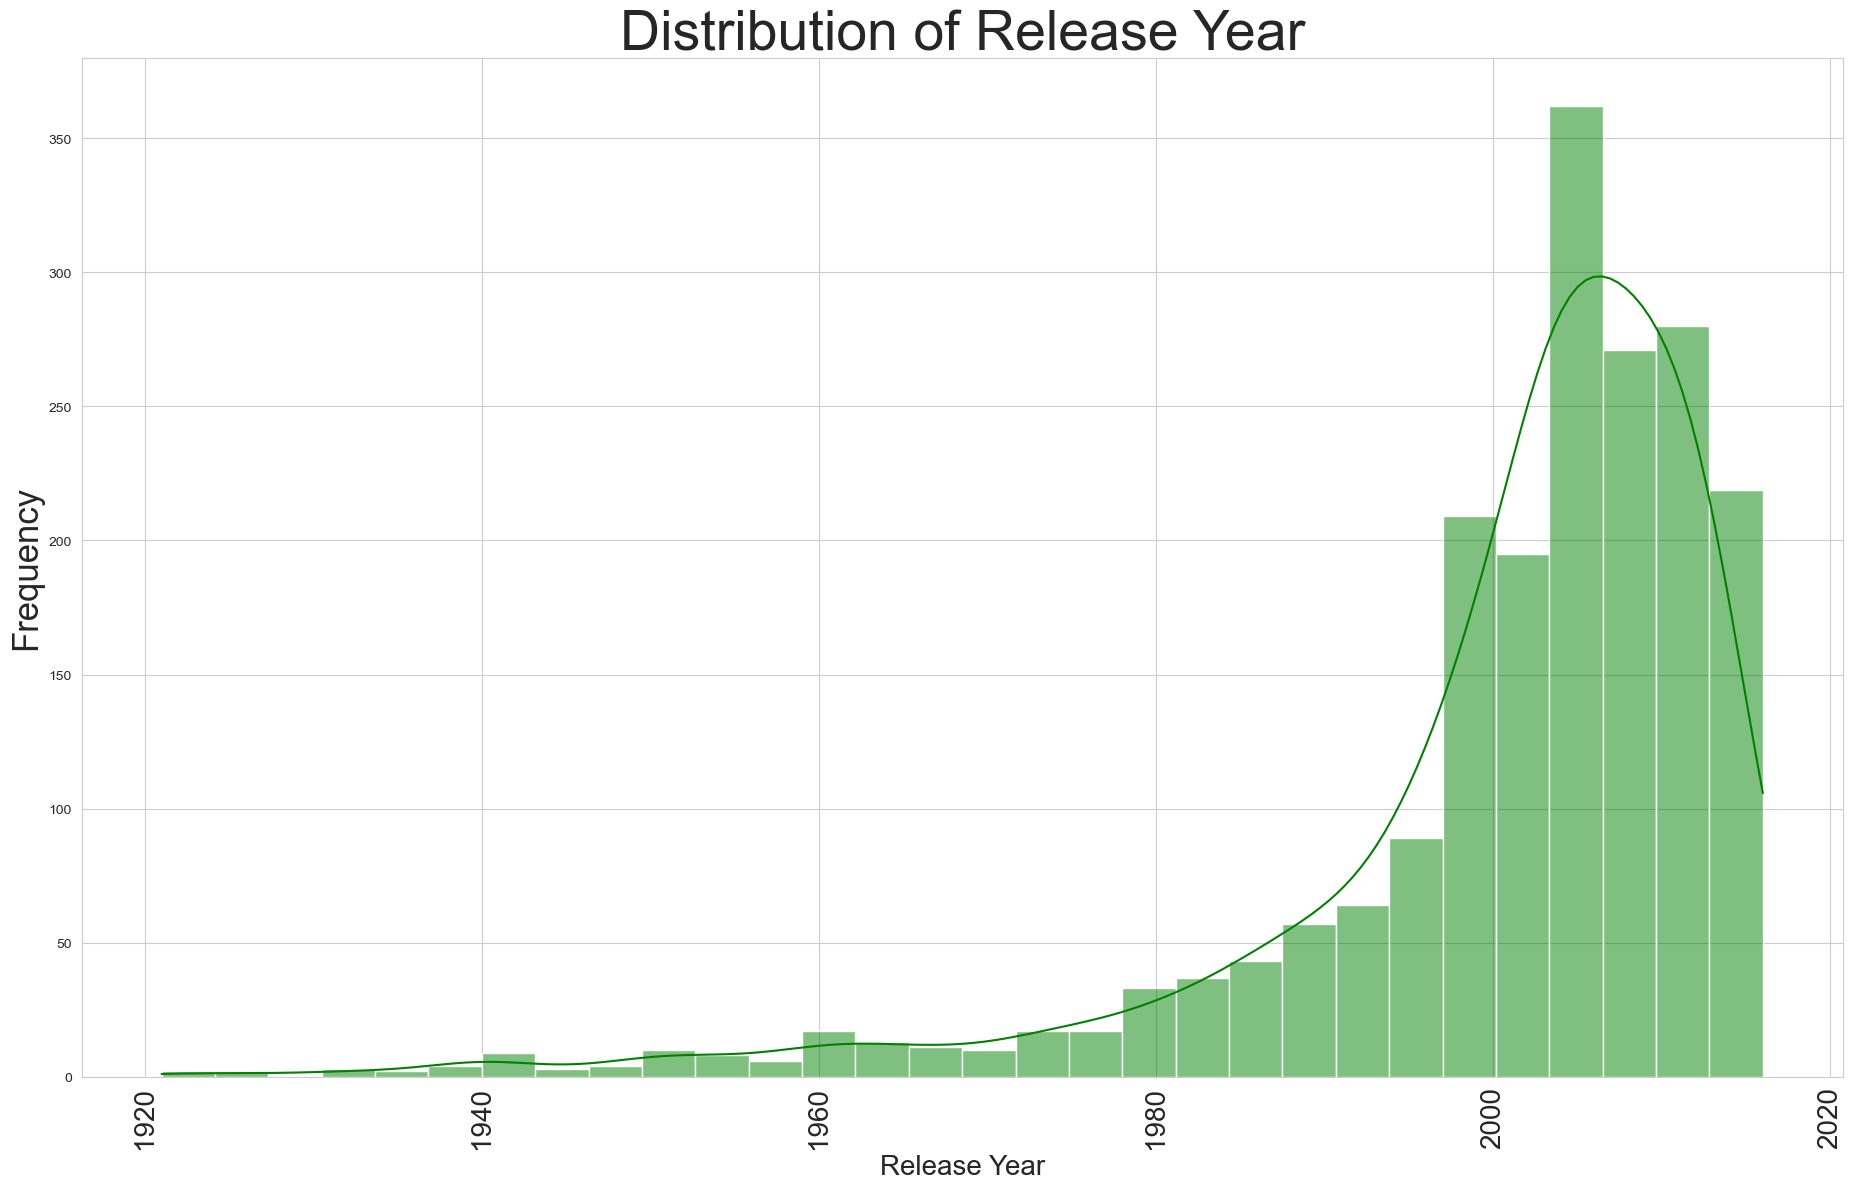

In [15]:
# Plot distribution of 'Release year'
movies_df1 = pd.DataFrame(data)
sns.set_style("whitegrid")

# Initialize the figure with a specified size BEFORE creating subplots
plt.figure(figsize=(50, 45))

# Create a subplot in a 3x2 grid at position 3
plt.subplot(3, 2, 1)

# Plot the distribution of 'Runtime'
sns.histplot(data=movies_df1, x='Release year', bins=30, kde=True, color='green')

# Set the title and labels with larger font sizes for clarity
plt.title('Distribution of Release Year', fontsize=40) # Increase title font size
plt.xlabel('Release Year', fontsize=20) # Customize x-axis label font size

plt.ylabel('Frequency', fontsize=25) # Customize y-axis label font size

# Rotate x-axis labels to prevent overlap and set a readable font size
plt.xticks(rotation=90, fontsize=20)




Increasing Trend Over Time: There is a clear increasing trend in the number of movies released over the years. The number of movies starts to grow more significantly in the latter half of the 20th century, with a noticeable surge from the 1990s onwards.

Peaks and Declines: There are distinct peaks in certain years, where the number of movies released is especially high, followed by declines. This could indicate years where the movie industry was particularly active or years that were significant for cinema in terms of output.

Recent Dominance: The most recent years in the dataset, which seem to be the late 2000s and early 2010s, dominate the dataset. This could suggest either a bias towards more recent movies in the dataset collection process or an actual increase in movie production in recent years.

Possible Data Collection Bias: The very steep decline in the number of movies at the end of the plot suggests that the data may be incomplete for the last year(s) in the dataset, or it might represent a cut-off in the data collection process.

Centennial Markings: The x-axis labels are cluttered and include what appears to be centennial markings (e.g., '1900', '2000'). This labeling could be due to an attempt to mark every year, but due to the number of years, the labels overlap and become unreadable.

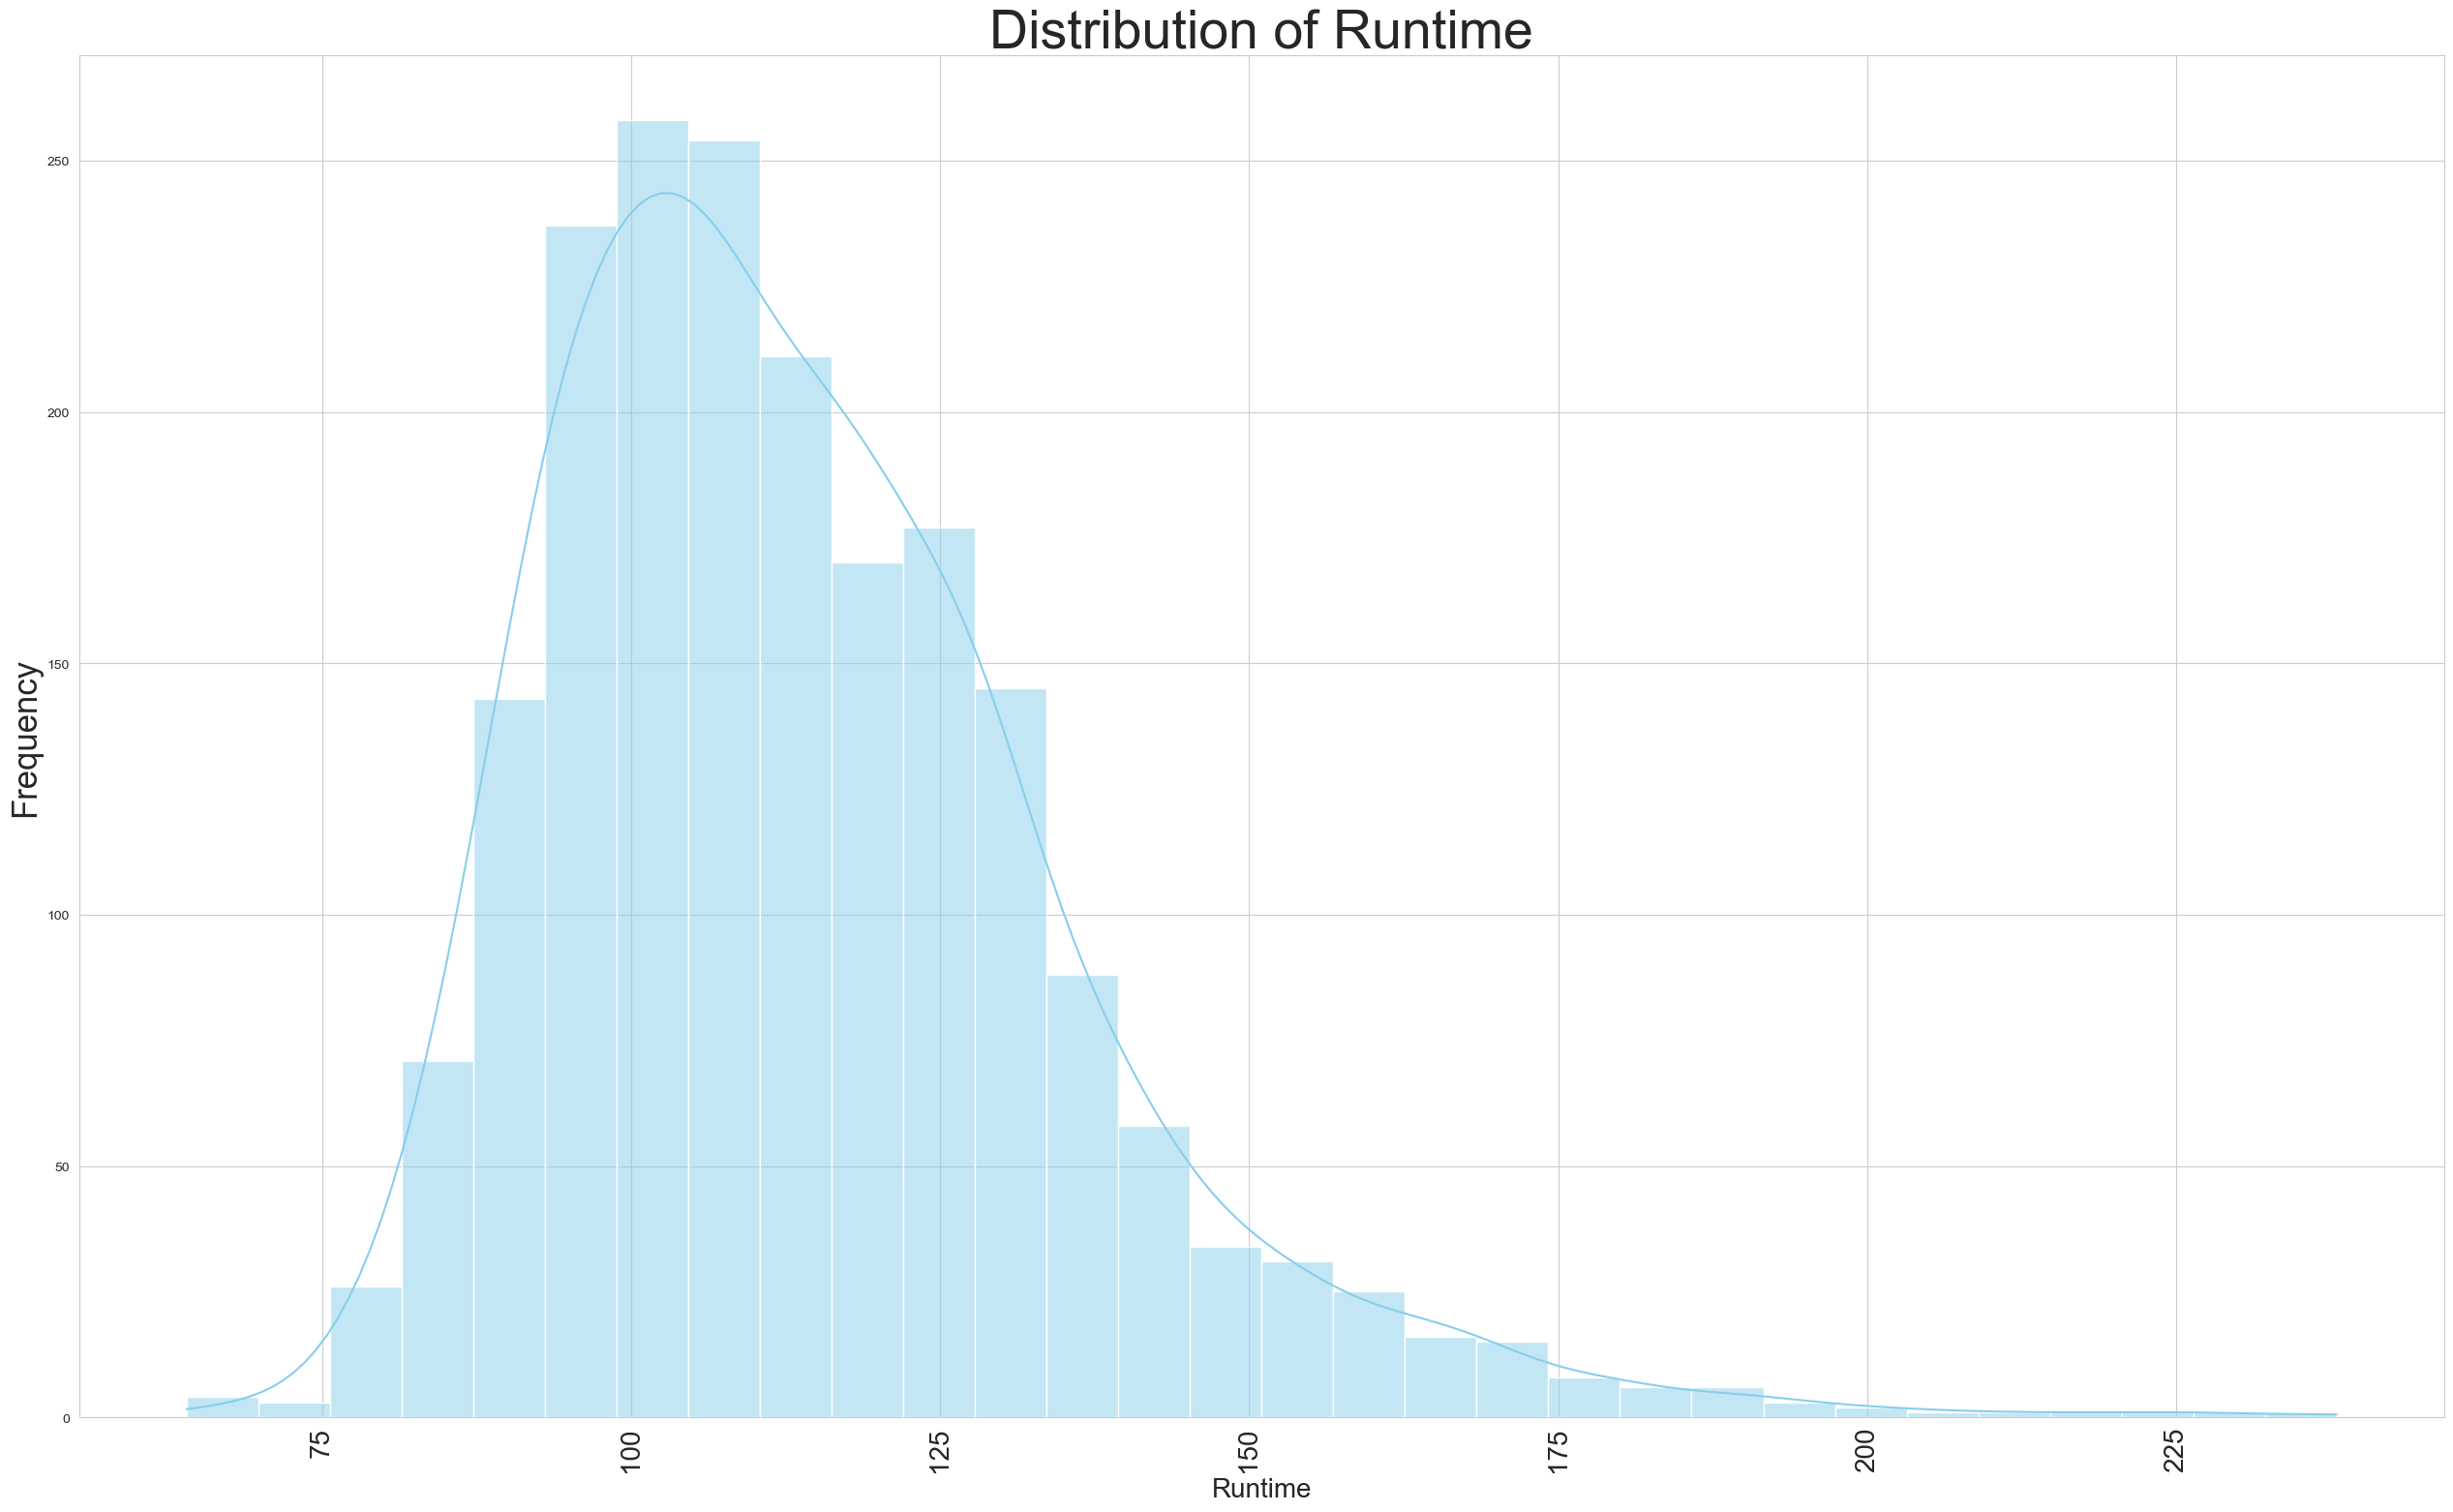

In [16]:
# Plot distribution of 'Runtime'
sns.set_style("whitegrid")

# Initialize the figure with a specified size BEFORE creating subplots
plt.figure(figsize=(50, 45))

# Create a subplot in a 3x2 grid at position 3
plt.subplot(3, 2, 2)

# Plot the distribution of 'Runtime'
sns.histplot(data=movies_df1, x='Runtime', bins=30, kde=True, color='skyblue')

# Set the title and labels with larger font sizes for clarity
plt.title('Distribution of Runtime', fontsize=40)
plt.xlabel('Runtime', fontsize=20) 
plt.ylabel('Frequency', fontsize=25)

# Rotate x-axis labels to prevent overlap and set a readable font size
plt.xticks(rotation=90, fontsize=20)


# Use tight layout to adjust subplot params
plt.tight_layout(pad=1.0)

# Display the plot
plt.show()

Normal-like Distribution: The histogram shows what appears to be a roughly normal distribution of movie runtimes. There's a clear central peak with frequencies tapering off on either side. This indicates that most movies have a duration close to the average runtime, with fewer films at the extremes of very short or very long.

Most Common Runtimes: The peak of the distribution suggests that the most common movie runtimes are around the center of the dataset's range. Given standard film lengths, this is likely in the vicinity of 90 to 120 minutes, which is typical for feature-length films.

Long-Tail on the Right: There's a long tail to the right of the distribution, indicating that while most movies are of standard length, there's a number of films with significantly longer runtimes. These could be epic films, extended versions, or movies that are outliers in terms of content and structure.

Few Very Short or Very Long Films: There are relatively few very short (under 80 minutes) or very long (over 150 minutes) films, which reflects traditional movie industry standards and audience expectations

Text(0.5, 0, 'Metascore')

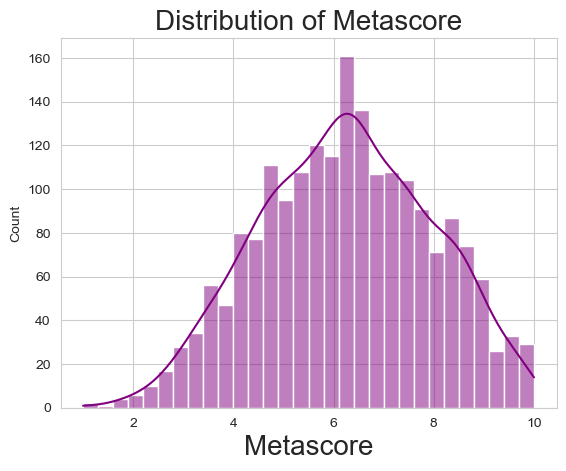

In [17]:
# Plot distribution of 'Metascore'


# Plot the distribution of 'Runtime'
sns.histplot(data=movies_df1, x='Metascore', bins=30, kde=True, color='purple')

# Set the title and labels with larger font sizes for clarity
plt.title('Distribution of Metascore', fontsize=20) # Increase title font size
plt.xlabel('Metascore', fontsize=20) # Customize x-axis label font size



Central Tendency: The distribution has a pronounced peak slightly above 5 on the Metascore scale. This peak indicates the most common range of scores that movies in this dataset received.

Skewness: The distribution seems to have a slight right skew, with a tail extending more toward the higher scores. This suggests that there are a few movies with very high Metascores compared to the rest.

Normality: Despite the skew, the overall shape of the distribution has a resemblance to a normal distribution, suggesting that Metascore values are fairly evenly spread around the mean.

Outliers: The peak at Metascore of 10 could indicate an outlier or a set of movies with exceptionally high scores, or it could be due to binning artifacts where the highest scores are lumped togethe

Text(0.5, 1.0, 'Distribution of Gross Revenue')

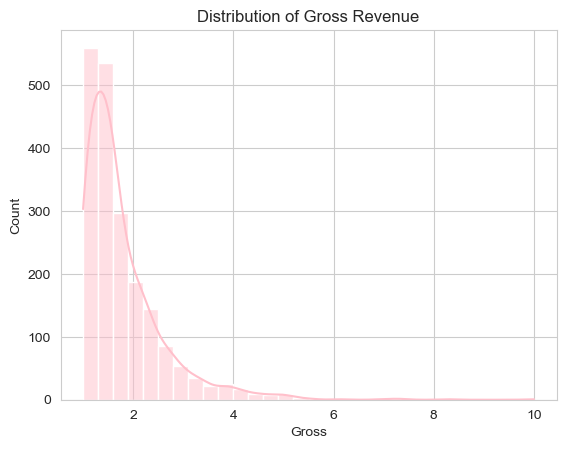

In [18]:
# Plot distribution of 'Gross'
sns.histplot(data=movies_df1, x='Gross', bins=30, kde=True, color='pink')
plt.title('Distribution of Gross Revenue')

The histogram for the distribution of gross revenue, assuming that 'Gross' is scaled in billions and the values range from 0 to 10, seems to indicate:

Right-Skewed Distribution: The graph shows that the gross revenue distribution is heavily skewed to the right, meaning there are a large number of movies that have relatively low earnings and a small number that have very high earnings.

Most Movies Earn Less: The peak at the lower end of the gross scale suggests that most movies earn on the lower side of the revenue spectrum.

Blockbusters Are Rare: The long tail to the right indicates that movies with extremely high gross revenues (blockbusters) are relatively rare compared to the total number of movies.

Kernel Density Estimate (KDE): The KDE line shows the probability density of the different gross revenues, emphasizing the skewness of the distribution.

Outliers Influence: The presence of outliers (the extremely high-grossing movies) has a significant impact on the shape of the distribution, pulling the mean to the right.

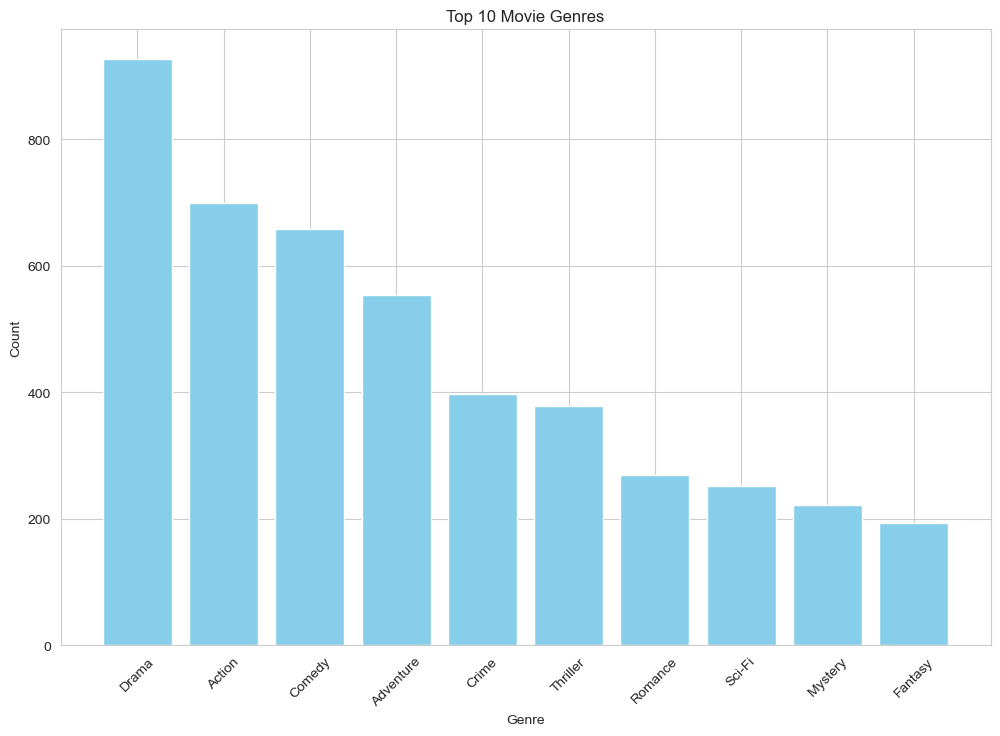

In [19]:
#bar plot for the top 10 genres among the movies in the dataset
movies_df1['Genre'] = movies_df1['Genre'].str.split(', ')

# Flatten the list of genres and count the occurrences of each genre
genre_counts = Counter(genre for genres_list in movies_df1['Genre'] for genre in genres_list)

# Get the most common genres (for example, the top 10)
top_genres = genre_counts.most_common(10)

# Separate the genres and their counts for plotting
genres, counts = zip(*top_genres)

# Create the bar chart
plt.figure(figsize=(12, 8))
plt.bar(genres, counts, color='skyblue')
plt.title('Top 10 Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate the genre labels to fit and be readable
plt.show()

Drama Dominates: The genre with the highest count is Drama, indicating that it's the most prevalent genre among the movies in the dataset.

Action and Comedy Are Popular: Following Drama, Action and Comedy genres also have significant counts, suggesting these are popular genres.

Variety in Top Genres: The presence of Adventure, Crime, Thriller, Romance, Sci-Fi, Mystery, and Fantasy shows there is a good mix of genres represented in the top ten.

Fantasy Less Common: Fantasy appears to be the least common among the top genres, but still makes it to the top ten list.

Implications for Production: The popularity of genres like Drama and Action could influence production decisions in the film industry, as these genres might be associated with a higher likelihood of commercial success.

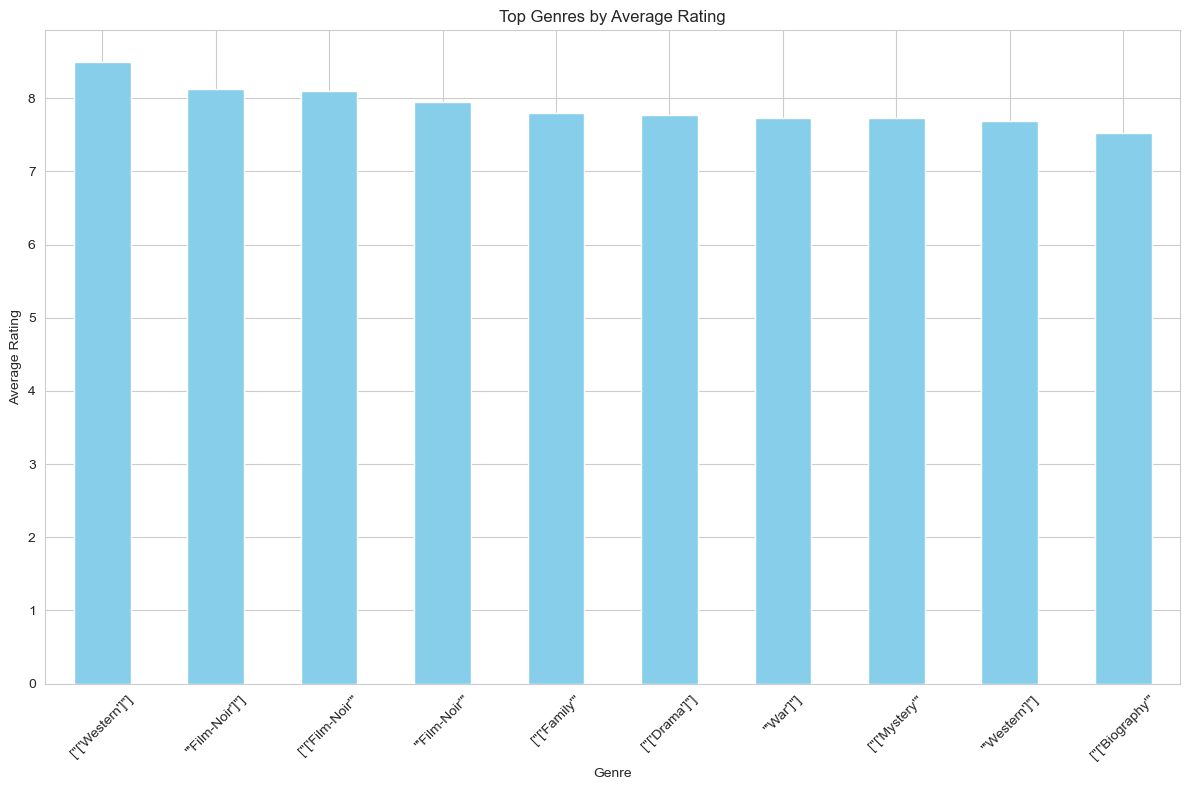

In [21]:
# Make sure 'Genre' is a string and split it on commas
movies_df1['Genre'] = movies_df1['Genre'].astype(str).str.split(', ')

# Explode the DataFrame so each genre gets its own row, duplicating the ratings
exploded_df = movies_df1.explode('Genre')

# Group by Genre and calculate the average rating
genre_ratings = exploded_df.groupby('Genre')['Rating'].mean().sort_values(ascending=False)

# Visualize the top N genres by mean rating
top_n = 10  # You can change this to display more or fewer genres
genre_ratings.head(top_n).plot(kind='bar', figsize=(12, 8), color='skyblue')

# Set the title and labels
plt.title('Top Genres by Average Rating')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


Consistent High Ratings: All the genres shown have high average ratings, which likely means they are well-received by audiences or critics.

Close Range: The average ratings are in a close range, suggesting that no single genre drastically outperforms the others in terms of average rating.

Popularity vs. Rating: This chart does not necessarily reflect the popularity of the genres, but rather how highly they are rated on average.

Representation Issue: The genres might contain varying numbers of movies, which isn't depicted in this type of visualization. A genre with a high average rating but few movies could be overrepresented compared to a genre with many movies and a slightly lower average rating.

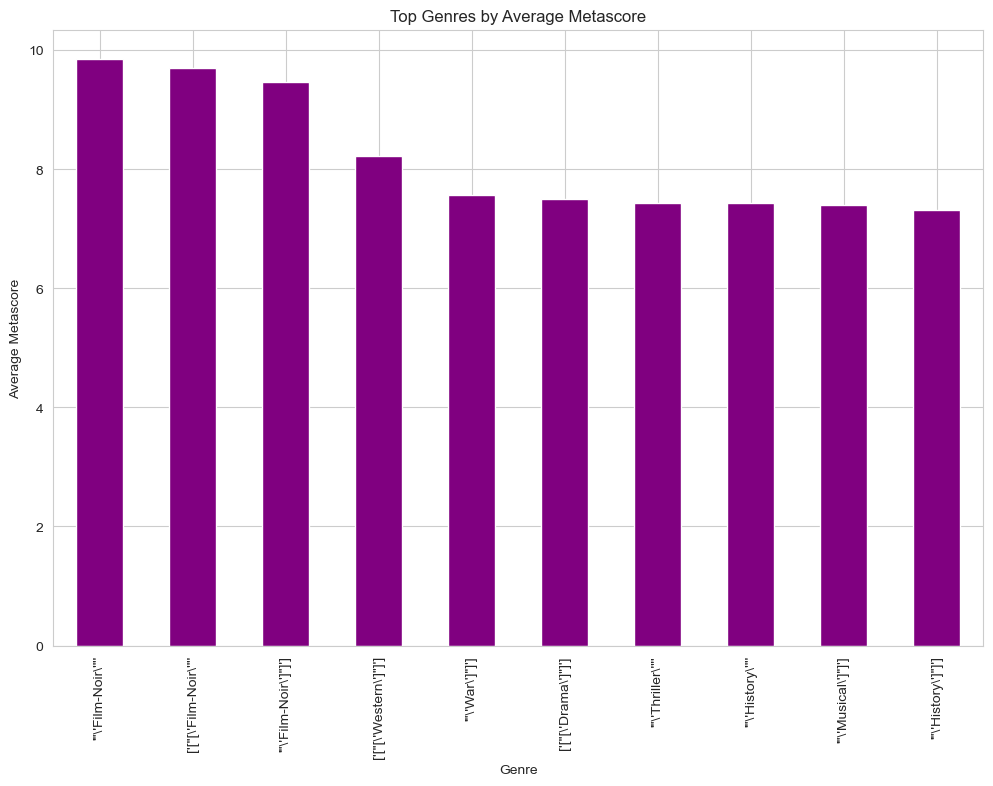

In [22]:
# Convert 'Genre' to a list of genres if it's a string
movies_df1['Genre'] = movies_df1['Genre'].astype(str).str.split(', ')

# Explode the DataFrame on the 'Genre' column so each genre has its own row
exploded_df = movies_df1.explode('Genre')

# Group by 'Genre' and calculate the average Metascore
genre_metascore = exploded_df.groupby('Genre')['Metascore'].mean().sort_values(ascending=False)

# Now, plot the top N genres by average Metascore
top_n = 10  # You can choose how many top genres you want to display
genre_metascore.head(top_n).plot(kind='bar', figsize=(12, 8), color='purple')

# Add title and labels
plt.title('Top Genres by Average Metascore')
plt.xlabel('Genre')
plt.ylabel('Average Metascore')

# Show plot
plt.show()

Data cleaning needed

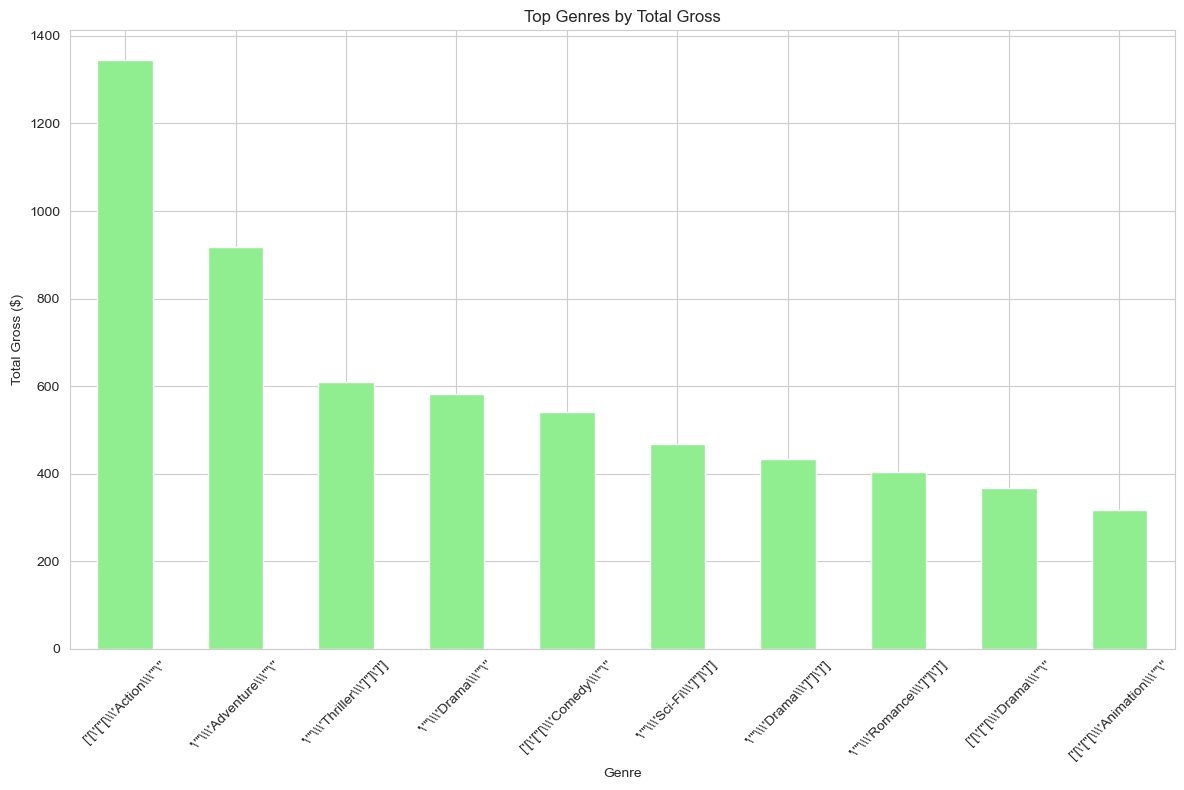

In [24]:
# Ensure 'Genre' is a string and split it on commas if it's not already a list
movies_df1['Genre'] = movies_df1['Genre'].astype(str).str.split(', ')

# Ensure 'Gross' is a float
movies_df1['Gross'] = pd.to_numeric(movies_df1['Gross'], errors='coerce')

# Explode the DataFrame on the 'Genre' column so each genre gets its own row
exploded_df = movies_df1.explode('Genre')

# Group by Genre and calculate the total gross
genre_gross = exploded_df.groupby('Genre')['Gross'].sum().sort_values(ascending=False)

# Visualize the top N genres by total gross
top_n = 10  # You can change this to display more or fewer genres
genre_gross.head(top_n).plot(kind='bar', figsize=(12, 8), color='lightgreen')

# Add title and labels
plt.title('Top Genres by Total Gross')
plt.xlabel('Genre')
plt.ylabel('Total Gross ($)')
plt.xticks(rotation=45)  # Rotate the labels for better readability

# Show plot
plt.tight_layout()  # Adjust subplot params
plt.show()

<Axes: xlabel='IMDb rating', ylabel='Gross'>

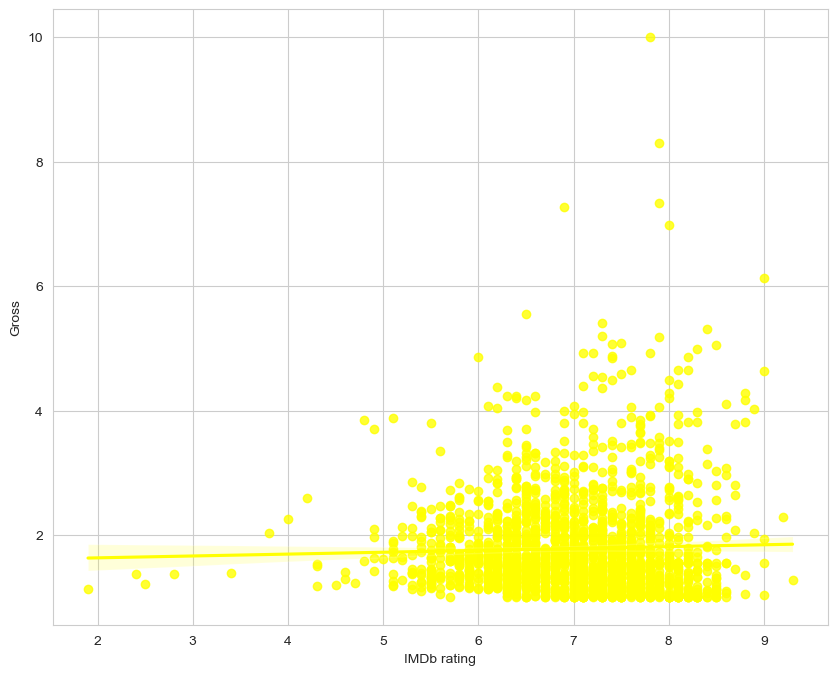

In [31]:
plt.figure(figsize=(10,8))
sns.regplot(x='IMDb rating',y='Gross',data=movies_df1,color='yellow')

Density of Data Points: The majority of the data points are clustered at the lower end of the Gross revenue axis, suggesting that most movies do not earn extremely high gross revenues, which is consistent with the industry where a few movies earn the majority of the revenue.

Scatter Distribution: There is a wide scatter in Gross revenue across all IMDb ratings. Movies with mid-range IMDb ratings (around 5 to 8) show a wide variation in Gross revenue, indicating that a moderate IMDb rating does not necessarily predict a movie's financial success.

High Grossing Outliers: There are a few outliers with very high Gross revenues, which appear to be spread across a range of IMDb ratings from around 6 to 9. These are likely blockbuster hits that, regardless of their IMDb rating, managed to achieve significant box office success.

Lack of Strong Correlation: There does not appear to be a strong direct correlation between IMDb ratings and Gross revenue. While there are movies with high ratings that have high Gross revenues, there are also many with high ratings that do not gross as much, and vice versa.

Ratings Concentration: The IMDb ratings are concentrated between approximately 6 and 8, which could indicate that most movies in the dataset are of average to good quality, as perceived by IMDb users.

Rating Threshold for High Gross: There seems to be a threshold IMDb rating (around 6) below which very few movies achieve high gross revenues. Most of the higher grossing movies have a rating above this threshold.

No Clear Trend: There is no clear upward or downward trend in the plot that would suggest higher ratings correspond to higher gross revenues or vice versa.

In summary, the plot suggests that while there may be a general positive trend (movies with higher ratings also tend to have higher gross revenues), there are many exceptions, and the relationship is not strong enough to make definitive predictions about a movie's financial success based solely on its IMDb rating. Other factors not depicted in the scatter plot, such as budget, marketing, genre, and release timing, likely play significant roles in a movie's gross revenue.

<Axes: xlabel='Metascore', ylabel='Gross'>

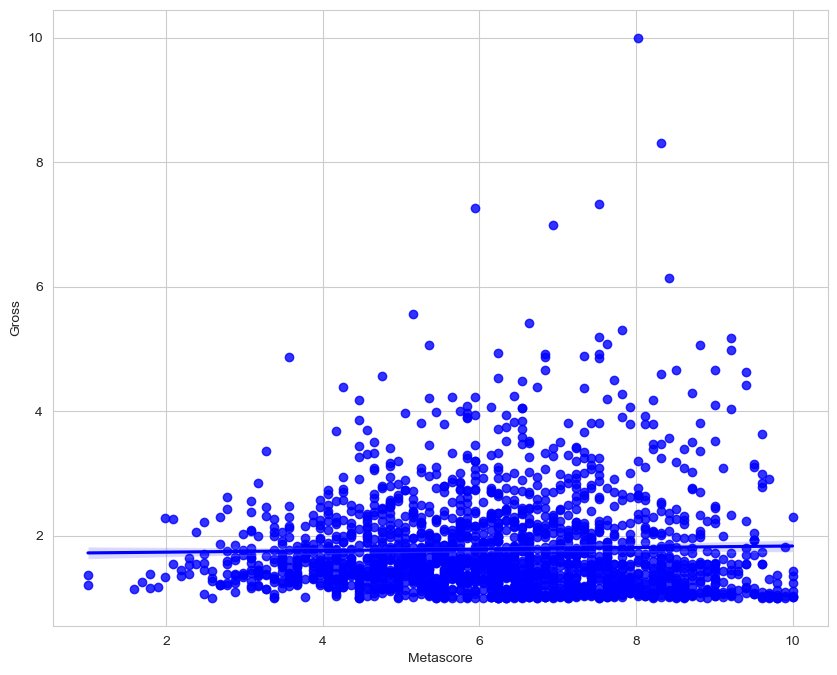

In [33]:
plt.figure(figsize=(10,8))
sns.regplot(x='Metascore',y='Gross',data=movies_df1,color='blue')

Weak to No Apparent Correlation: The visualization does not show a clear linear relationship between Gross revenue and Metascore. The data points are widely spread out, indicating that a higher Metascore doesn't consistently align with higher Gross revenue, and vice versa.

High Grossing Films Across Metascores: There are films with a wide range of Metascores that have achieved high Gross revenue. This indicates that factors other than critical acclaim, as measured by Metascore, may have a substantial impact on financial success.

Cluster of Lower Grossing Films: There is a concentration of data points at the lower end of the Gross revenue scale across various Metascores. This means most movies do not achieve enormous box office success regardless of their critical reception.

Outliers: Some films show exceptionally high Gross revenue, which could be attributed to blockbuster status, but these do not necessarily have the highest Metascores. Conversely, some films with high Metascores do not show exceptionally high Gross revenue.

In summary, the relationship between Gross revenue and Metascore in this data appears to be non-linear and weak. Critical acclaim, as assessed by Metascore, is not a guaranteed predictor of financial performance at the box office. The success in terms of revenue is likely influenced by a multitude of factors, including but not limited to, marketing, distribution, audience appeal, star power, and competition at the time of release.

<Axes: xlabel='Runtime', ylabel='Gross'>

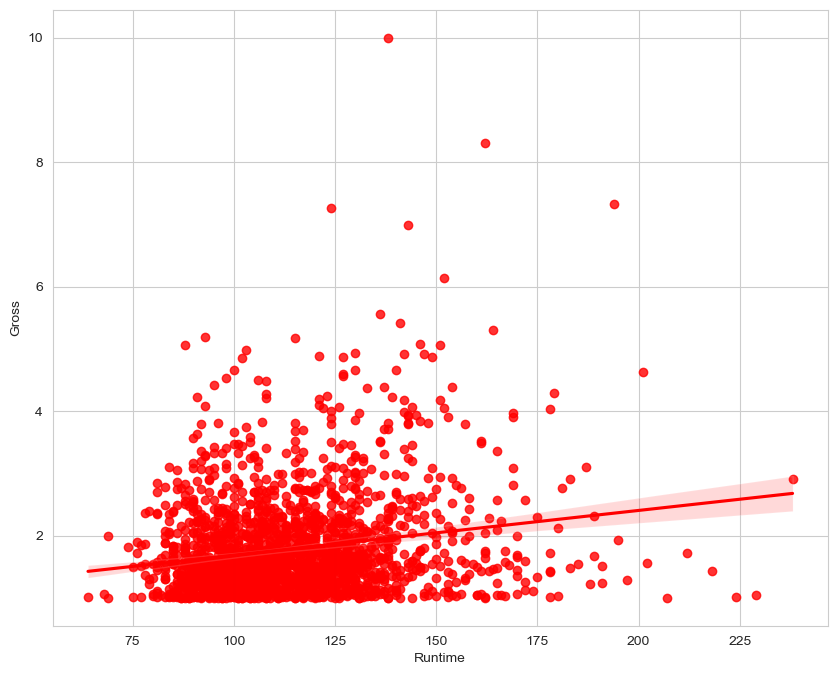

In [36]:
plt.figure(figsize=(10,8))
sns.regplot(x='Runtime',y='Gross',data=movies_df1,color='red')

Weak Positive Correlation: The upward slope of the trend line suggests there is a weak positive correlation between runtime and gross. In general, as movies get longer, they might gross slightly more, but this relationship is not strong.

Concentration of Data Points: There is a significant concentration of data points at the lower end of the Gross axis, indicating that most movies have a lower gross revenue. This is typical for the film industry, where a majority of movies do not become blockbuster hits.

Spread of Gross Revenues: For any given runtime, there is a wide spread of gross revenues. This implies that runtime alone is not a strong predictor of a movie's financial success.

Outliers: Some movies with long runtimes appear to have higher gross revenues, indicating that certain longer films can be quite successful. However, there are also long movies that do not gross as much.

High Grossing Short Films: There are also outliers with shorter runtimes that have high gross revenues. These could be highly successful short films or films with significant cultural impact.

Popular Movie Durations: The dense cluster of data points around the 90-120 minute mark corresponds with the typical runtime for feature films and indicates that most movies adhere to this industry standard.

Runtime Limitation for Success: The trend line and data points suggest that there's no strong threshold effect where movies have to be a certain length to achieve higher gross revenue.

The relationship depicted by the trend line is a generalization, and the substantial scatter around it suggests that there are many other factors at play that influence a movie's gross revenue, such as genre, marketing, the presence of star actors, competition at the time of release, and overall market conditions.